In [116]:
#首先导入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 载入数据

In [117]:
#因为数据框是一种允许每一列属于不同数据类型的二维数据结构，能够契合题中的csv文档，故将csv文档中的数据加载到DataFrame中
titanic_df = pd.read_csv('titanic-data.csv')

In [118]:
#接下来大致浏览下数据的概貌，打出头10行进行观察，发现存在缺失值
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [119]:
#再来看看各列的数据类型有没有需要修改的地方
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

可以看到每一列的数据类型都能贴合实际情况，故无需做修改

In [120]:
#最后看看数据的一些描述性统计
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 提出问题

# 清理数据

In [121]:
#由于存在缺失值，我们先来观察一下各列缺失值的情况
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [122]:
# 因为姓名、票号、舱位名、登船口和费用这些数据在整个分析过程中对所讨论的问题不起影响，所以将其从表中删除
titanic_df.drop(['Name','Ticket','Cabin','Embarked','Fare'],axis=1,inplace=True)

In [123]:
#现在只剩年龄需要填充，因为该项目中数据较为充分，平均值能较好地反应数据的集中情况，
#这里尝试用年龄的均值对其进行填充，再看填充后的统计数据有没有大的出入。
new_titanic_df=titanic_df.fillna(titanic_df['Age'].mean())

In [124]:
#可以看到调整后不存在缺失值了
new_titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64

In [125]:
#将数据集中SibSp和Parch合并为Family
new_titanic_df['Family']=new_titanic_df['SibSp']+new_titanic_df['Parch']
#将SibSp和Parch删除
new_titanic_df.drop(['SibSp','Parch'],axis=1,inplace=True)

In [126]:
#下面观察一下新数据框的情况，正如预期
new_titanic_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Family
0,1,0,3,male,22.000000,1
1,2,1,1,female,38.000000,1
2,3,1,3,female,26.000000,0
3,4,1,1,female,35.000000,1
4,5,0,3,male,35.000000,0
5,6,0,3,male,29.699118,0
6,7,0,1,male,54.000000,0
7,8,0,3,male,2.000000,4
8,9,1,3,female,27.000000,2
9,10,1,2,female,14.000000,1


In [127]:
#看下新数据框的统计数据，发现年龄的标准差、四分位数都发生了变化，但和原数据出入不大，
#故可以认定以年龄均值作填充是个较好的尝试
new_titanic_df.describe()

,PassengerId,Survived,Pclass,Age,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.904602
std,257.353842,0.486592,0.836071,13.002015,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,10.000000


# 探索数据

首先来看下生还率与其他各变量的相关系数，以此作为初步认识，因为性别并非数值，所以先将其转化为数值来表示

In [128]:
#将男女分别以0和1表示
new_titanic_df['Sex'] = new_titanic_df['Sex'].map({'male':0,'female':1})

In [129]:
#打出头5行观察
new_titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Family
0,1,0,3,0,22.0,1
1,2,1,1,1,38.0,1
2,3,1,3,1,26.0,0
3,4,1,1,1,35.0,1
4,5,0,3,0,35.0,0


现在所有数据都是数值形式了，可以计算生还率与其余变量的相关情况

In [130]:
#查看生存率与其余变量的相关系数
new_titanic_df.corrwith(new_titanic_df['Survived'])

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex            0.543351
Age           -0.069809
Family         0.016639
dtype: float64



接下来依次讨论上述提出的四个问题

## 问题一：船舱等级与生还率的关系

首先计算各船舱等级的人口分布,确保每个等级有足够的人数，从而使分析结果更有说服力

3    491
1    216
2    184
Name: Pclass, dtype: int64


Text(0.5,1,u'Pclass VS Count')

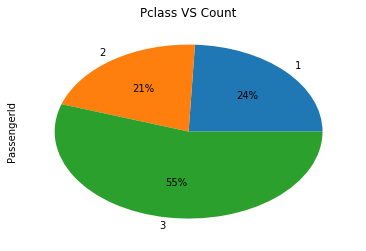

In [131]:
#计算各等级的人数
print new_titanic_df['Pclass'].value_counts()
#用饼图表示分布情况
new_titanic_df.groupby('Pclass').count()['PassengerId'].plot(kind='pie',autopct='%.0f%%')
plt.title('Pclass VS Count')

可以看到人数分布较为合理，分析继续

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


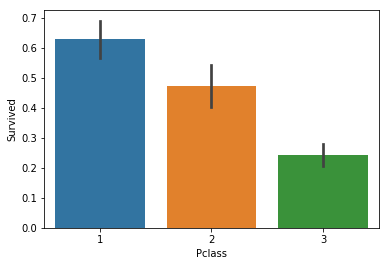

In [132]:
#我们用groupby语句将数据按船舱等级分组，并求出各组生还率的均值,结果以柱状图表示
print new_titanic_df.groupby('Pclass').mean()['Survived']
sns.barplot(x='Pclass', y='Survived', data=new_titanic_df)

可以看到随着舱位等级的下降，生还率明显降低

## 问题二：年龄与生还率的关系

由于年龄取值众多，先对其进行分组

In [133]:
#按倒序对年龄进行排列
new_titanic_df['Age'].sort_values(ascending=False)

630    80.00
851    74.00
493    71.00
96     71.00
116    70.50
672    70.00
745    70.00
33     66.00
456    65.00
280    65.00
54     65.00
438    64.00
545    64.00
275    63.00
483    63.00
829    62.00
252    62.00
555    62.00
570    62.00
326    61.00
170    61.00
625    61.00
694    60.00
587    60.00
684    60.00
366    60.00
232    59.00
94     59.00
11     58.00
195    58.00
       ...  
407     3.00
261     3.00
374     3.00
43      3.00
348     3.00
193     3.00
530     2.00
642     2.00
205     2.00
119     2.00
7       2.00
297     2.00
340     2.00
16      2.00
479     2.00
824     2.00
788     1.00
183     1.00
381     1.00
386     1.00
172     1.00
827     1.00
164     1.00
305     0.92
78      0.83
831     0.83
469     0.75
644     0.75
755     0.67
803     0.42
Name: Age, Length: 891, dtype: float64

可以看出年龄范围在0-80岁之间，按每15岁来分组可以依次分为小孩、青年、青壮年、中年和老年，由于75岁以上只有1人，故可忽略

In [134]:
#将年龄从0岁起分为5组，组距为15
bins =[0,15,30,45,60,75]
new_titanic_df['AgeGroup']=pd.cut(new_titanic_df['Age'], bins)

接下来确保各年龄段都有足够多的人数，从而使分析结果更有说服力

(15, 30]    503
(30, 45]    202
(0, 15]      83
(45, 60]     81
(60, 75]     21
Name: AgeGroup, dtype: int64


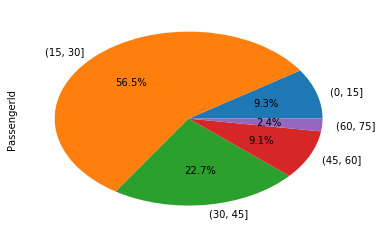

In [135]:
#各年龄段人数分布
print new_titanic_df['AgeGroup'].value_counts()
#用饼图表示分布
new_titanic_df.groupby('AgeGroup').count()['PassengerId'].plot(kind='pie',autopct='%.1f%%')

可以看到年龄段人数分布较不均匀，特别是老年人人数较少，可能导致结果不够准确，但不妨继续分析

AgeGroup
(0, 15]     0.590361
(15, 30]    0.335984
(30, 45]    0.425743
(45, 60]    0.407407
(60, 75]    0.190476
Name: Survived, dtype: float64


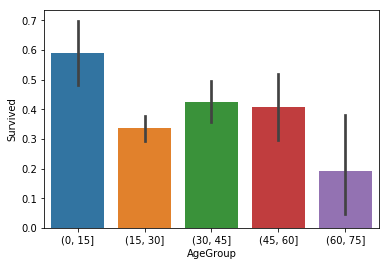

In [136]:
#按年龄段对数据进行分组，并计算每组生还率均值，以柱状图表示
print new_titanic_df.groupby(['AgeGroup']).mean()['Survived']
sns.barplot(x='AgeGroup', y='Survived', data=new_titanic_df)

可以直观地看到小孩子生还率最高，其次是青壮年和中年，接下来是青年，老年人生还率最低，但结果受数据量影响可能不准确

## 问题三：同行人数对生还率有什么影响

首先确保各规模的家庭都有足够多的人数，从而使分析结果更有说服力

In [137]:
#各规模家庭人数分布
new_titanic_df['Family'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64

In [138]:
#将家庭进行分组
bins =[0,1,4,11]
new_titanic_df['FamilyGroup']=pd.cut(new_titanic_df['Family'], bins,right = False,labels=['alone','small_family','big_family'])

FamilyGroup
alone           0.303538
small_family    0.578767
big_family      0.161290
Name: Survived, dtype: float64


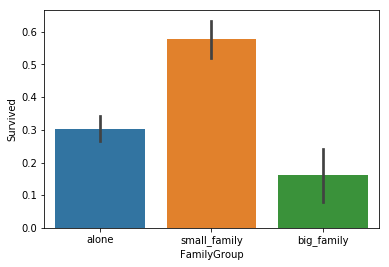

In [144]:
#根据不同规模家庭对数据进行分组，并求出各组生还率的均值，再以柱状图表示
print new_titanic_df.groupby('FamilyGroup').mean()['Survived']
sns.barplot(x='FamilyGroup',y='Survived',data=new_titanic_df)

## 问题四：不同性别在各等级舱位生还率的情况

### 这里涉及到三个变量，首先仅考虑性别如何影响生还率，再来分析性别和舱位等级对生还率的交叉影响。

首先确保男女都有足够多的人数，从而使分析结果更有说服力

0    577
1    314
Name: Sex, dtype: int64


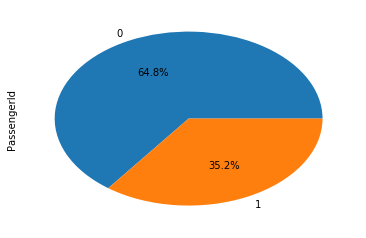

In [140]:
#计算男女乘客各自人数
print new_titanic_df['Sex'].value_counts()
#用饼图表示分布情况
new_titanic_df.groupby('Sex').count()['PassengerId'].plot(kind='pie',autopct='%.1f%%')

分布合理，分析继续

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64


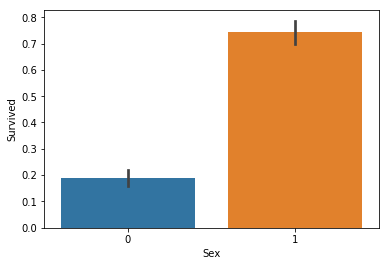

In [141]:
#将数据以性别进行分组，并求出各组生还率的均值
print new_titanic_df.groupby('Sex').mean()['Survived']
#用图形来表示性别和生存率之间的关系
sns.barplot(x='Sex',y='Survived',data=new_titanic_df)

可以明显看到女性有更高的生还率，接下来进行双变量分析,首先确保按双变量分组后各组的人数足够多，从而使分析结果更有说服力

Sex  Pclass
0    1         122
     2         108
     3         347
1    1          94
     2          76
     3         144
Name: PassengerId, dtype: int64


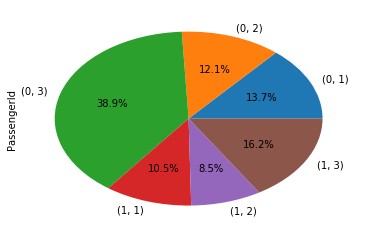

In [142]:
#计算按年龄，船舱等级分组后各组的人数
print new_titanic_df.groupby(['Sex','Pclass']).count()['PassengerId']
#用饼图表示分布情况
new_titanic_df.groupby(['Sex','Pclass']).count()['PassengerId'].plot(kind='pie',autopct='%.1f%%')

分布合理，分析继续

Sex  Pclass
0    1         0.368852
     2         0.157407
     3         0.135447
1    1         0.968085
     2         0.921053
     3         0.500000
Name: Survived, dtype: float64


Text(0,0.5,u'survival rate')

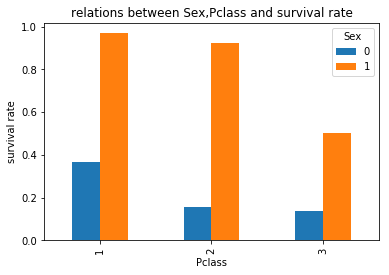

In [143]:
#我们将数据以性别和舱位等级两个变量进行分组，并求出各组生还率的均值
print new_titanic_df.groupby(['Sex','Pclass']).mean()['Survived']
#用图形来表示性别，舱位等级和生存率之间的关系
new_titanic_df.groupby(['Pclass','Sex']).mean()['Survived'].unstack().plot(kind='bar')
plt.title('relations between Sex,Pclass and survival rate')
plt.ylabel('survival rate')

# 总结

# 特别声明

上述结论是暂时且不完全准确的，缺乏进一步的统计论证，并需要改进

# 参考文献